# EDA

This is EDA of the [KuaiRec](https://kuairec.com/) dataset which has been presented in the paper of August 2022 [KuaiRec: A Fully-observed Dataset and Insights for Evaluating
Recommender Systems](https://arxiv.org/pdf/2202.10842.pdf)

The idea is to perform a preliminary data analysis on all the provided dataset to select the most interesting preprocessing and model to be used in our final implementation

Here are the following questions I will try to answer:
* General questions:
    - Data types ✅
    - Missing values / Inconsistency ✅
    - Features in each dataset ✅
    - Size ✅
    - Duplicates ✅
    - Outliers ✅

* User Activity / Features:
    - Who are the unique users ? ✅
    - What is the number of interactions per user ? ✅
    - What is the frequence of interactions, are there any periodic behavior ?
    - Who are famous (lots of followers) ? ✅
    - What are the differences in interaction between users who are / are not engaged ? ✅
    - What are the differences in interaction between video maker and not video maker ? ✅
    - Do specific users interact with specific types of content ?
    - What is the average number of videos each user interacts with over time ?
    - Are there groups of users who tend to interact with the same videos ?
    - How long does it take for a user to re-interact with the same creator or video type?
    - What’s the average session duration per user? How many videos per session?
    - How does user activity evolve over their lifetime on the platform (new vs. old users)?

* Video Characteristics:
    - What are the types of videos ?
    - What are the unique videos ? ✅
    - What are famous videos ? ✅
    - What is the correlation between engagement and duration ? ✅
    - Are there any patterns between the number of views and the level of engagement?
    - How long do “famous” videos stay relevant? (popularity lifespan)
    - What kinds of videos generate the most rewatches?
    - What is the age of a video's impact ?
    - Are there temporal trends in interactions ?
    - How quickly do users interact with a new video after it’s posted?

## Imports

In [18]:
# Import libraries
import pandas as pd
import numpy as np
from cycler import cycler
import matplotlib.pyplot as plt
import seaborn as sns

from eda_utils import plot_hist_feature

# set plot size
plt.rcParams["figure.figsize"] = (20, 13)
colors = plt.get_cmap('tab10').colors
plt.rc('axes', prop_cycle=cycler('color', colors))
%matplotlib inline
%config InlineBackend.figure_format = "retina"

## Dataset

According to the paper, 

| #Users | #Items | #Interactions | Density  |
|--------|--------|---------------|----------|
| 1,411  | 3,327  | 4,676,570     | 99.6%    |
| 7,176  | 10,728 | 12,530,806    | 16.3%    |

---

* User feature: Each user has 30 features which includes 12
explicit features and 18 encrypted vectors.

* Item feature: Each video has at least 1 and at most 4 tags
out of the totally 31 tags, e.g., {Sports}.
Each item has 56 explicit features, where
45 fields are the statistics of each day.

* Social network: Small matrix: 146 users have friend


In [103]:
%%bash
wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470
' -O KuaiRec.zip
unzip KuaiRec.zip -d data_final_project

--2025-04-25 13:24:33--  https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470%0A
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 216.58.214.65, 2a00:1450:4007:807::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|216.58.214.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 431964858 (412M) [application/octet-stream]
Saving to: ‘KuaiRec.zip’

     0K .......... .......... .......... .......... ..........  0% 5.11M 81s
    50K .......... .......... .......... .......... ..........  0% 5.67M 77s
   100K .......... .......... .......... .......... ..........  0% 20.2M 58s
   150K .......... .......... .......... .......... ..........  0% 9.40M 54s
   200K .......... .......... .......... .......... ..........  0% 28.9M 46s
   250K .......... .......... .......... .......... ..........  0% 16.3M 43s
   300K ......

Process was interrupted.


CalledProcessError: Command 'b"wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470\n' -O KuaiRec.zip\nunzip KuaiRec.zip -d data_final_project\n"' died with <Signals.SIGINT: 2>.

## Interractions (big matrix / small matrix)

This is our training dataset.

The training set is known to be sparsed, this means there are not a lot of interactions between each video and users

In [2]:
interactions_train = pd.read_csv("data_final_project/KuaiRec 2.0/data/big_matrix.csv")
interactions_train.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


In [ ]:
interactions_train.shape

In [ ]:
interactions_train.describe()

In [3]:
interactions_test = pd.read_csv("data_final_project/KuaiRec 2.0/data/small_matrix.csv")
interactions_test.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364


In [ ]:
interactions_test.shape

### General questions

#### DTypes

In [ ]:
print(interactions_train.dtypes)
print(interactions_test.dtypes)
print(interactions_train["date"].head())
print(interactions_test["date"].head()) # to convert datetime
print(interactions_train["time"].head())
print(interactions_test["time"].head()) # to convert datetime

#### Missing values

In [ ]:
print(interactions_train.isna().any())
print(interactions_test.isna().any())
print(interactions_test.dropna().shape[0] / interactions_test.shape[0])
interactions_test = interactions_test.dropna()

In [ ]:
print(f"{interactions_test.memory_usage(deep=True).sum() / (1024 ** 2)} MB")
print(f"{interactions_train.memory_usage(deep=True).sum() / (1024 ** 2)} MB")

In [4]:
# Duplicates
print(
    interactions_train[interactions_train.duplicated(['user_id', 'video_id'], keep=False)]
    .sort_values(by=['user_id', 'video_id'])
)
interactions_train = interactions_train[~interactions_train.duplicated(['user_id', 'video_id'], keep='first')]
print(
    interactions_test[interactions_test.duplicated(['user_id', 'video_id'], keep=False)]
    .sort_values(by=['user_id', 'video_id'])
)
interactions_test = interactions_test[~interactions_test.duplicated(['user_id', 'video_id'], keep='first')]

          user_id  video_id  play_duration  video_duration  \
9               0       169          13735            9767   
807             0       169          13287            9767   
15              0       206            818            9067   
834             0       206            721            9067   
36              0       217          14311            5367   
...           ...       ...            ...             ...   
12530635     7175     10408          57187            6188   
12530626     7175     10552           4642           31486   
12530627     7175     10552           4642           31486   
12530710     7175     10572           4159           14165   
12530711     7175     10572           4159           14165   

                             time      date     timestamp  watch_ratio  
9           2020-07-06 00:14:48.8  20200706  1.593966e+09     1.406266  
807       2020-08-03 03:30:46.769  20200803  1.596397e+09     1.360397  
15        2020-07-06 01:07:48.597  2

### Unique Users

In [ ]:
unique_train_users = set(interactions_train["user_id"].unique())
unique_test_users = set(interactions_test["user_id"].unique())
print(f"{len(unique_train_users)} users in training")
print(f"{len(unique_test_users)} users in test")
print(f"{len(unique_train_users & unique_test_users)} users in both") # data is consistent and match paper properties

### Unique Videos

In [ ]:
unique_train_videos = set(interactions_train["video_id"].unique())
unique_test_videos = set(interactions_test["video_id"].unique())
print(f"{len(unique_train_videos)} videos in training")
print(f"{len(unique_test_videos)} videos in test")
print(f"{len(unique_train_videos & unique_train_videos)} videos in both") # data is consistent and match paper properties

#### Video duration correlation

We see some incohrence in dataset, we should mean video duration incoherence and apply on the whole dataset

The video duration does not have a lot of information gain as well

/tmp/ipykernel_191/1144998822.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(binned_data['duration_bin'].astype(str), rotation=45)


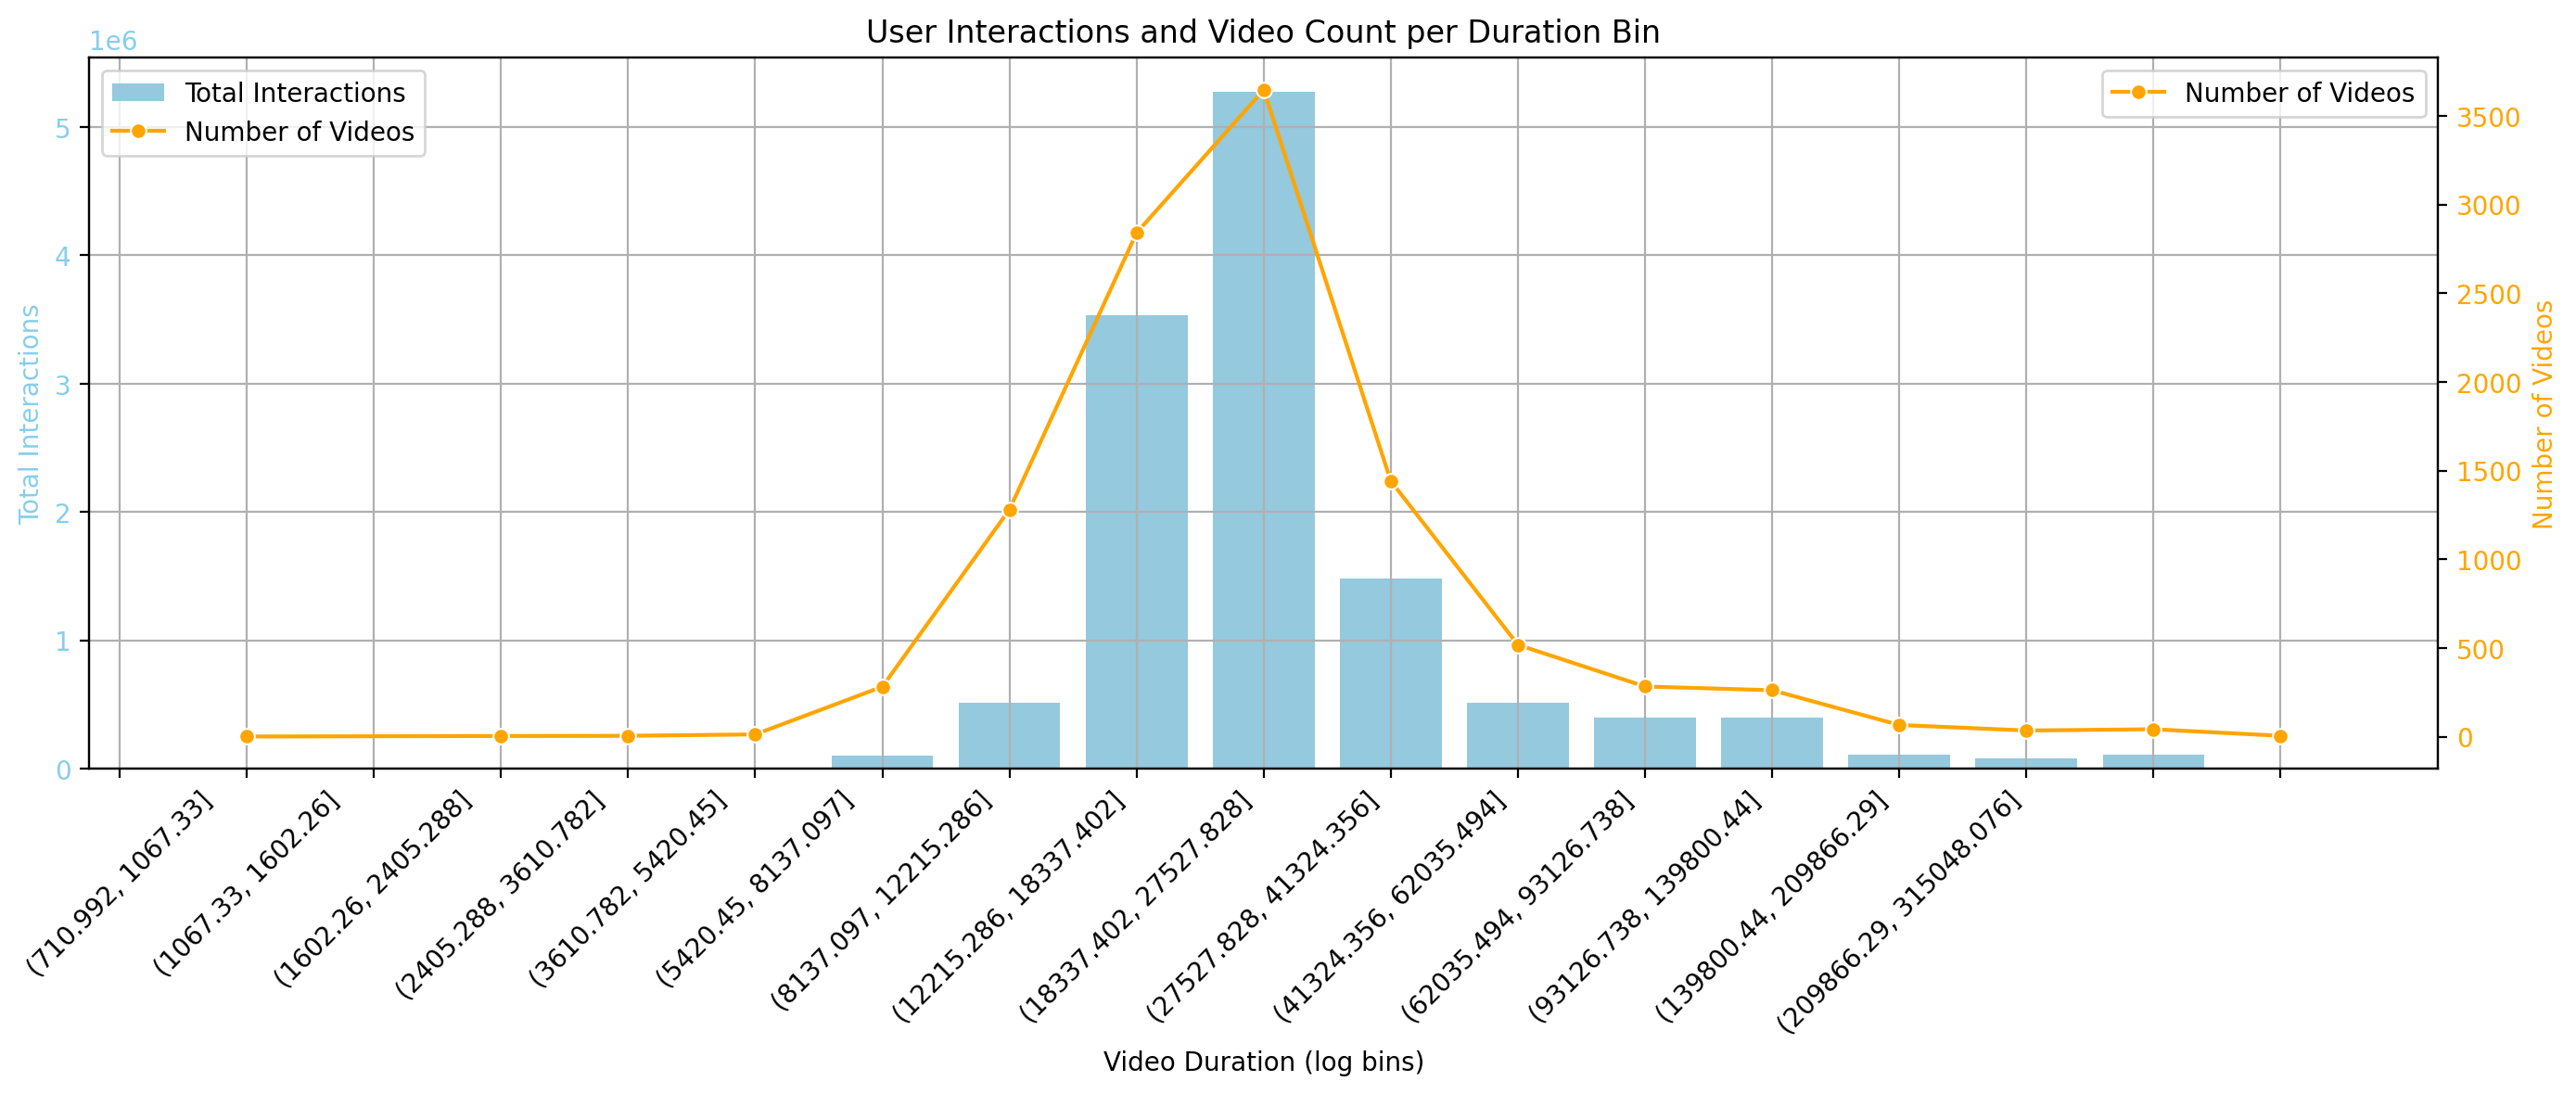

In [31]:

video_interactions = interactions_train.groupby('video_id').size().reset_index(name='interaction_count')

video_durations = interactions_train.groupby('video_id')['video_duration'].mean().reset_index()

video_data = pd.merge(video_interactions, video_durations, on='video_id')

log_bins = np.logspace(np.log10(video_data['video_duration'].min()),
                       np.log10(video_data['video_duration'].max()), num=20)
video_data['duration_bin'] = pd.cut(video_data['video_duration'], bins=log_bins)

binned_data = video_data.groupby('duration_bin', observed=True).agg(
    total_interactions=('interaction_count', 'sum'),
    video_count=('video_id', 'count')
).reset_index()

fig, ax1 = plt.subplots(figsize=(14, 6))

sns.barplot(data=binned_data, x='duration_bin', y='total_interactions', ax=ax1, color='skyblue', label='Total Interactions')
ax1.set_ylabel('Total Interactions', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(binned_data['duration_bin'].astype(str), rotation=45)
ax1.set_xlabel('Video Duration (log bins)')
ax1.set_title('User Interactions and Video Count per Duration Bin')
ax1.grid(True)

ax2 = ax1.twinx()
binned_data['bin_label'] = binned_data['duration_bin'].astype(str)
sns.lineplot(data=binned_data, x='bin_label', y='video_count', ax=ax2, color='orange', marker='o', label='Number of Videos')
ax2.set_ylabel('Number of Videos', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

### Interaction per user

There is no need to verify interaction per user in test set since the density is almost 100%.

**Uniquess**
We remark that user interaction when we remove duplicate interactions (when user replay the video), we have a gaussian dstribution with outliers for user having less than 600 interactions.

In [ ]:
# Interactions per user with unique videos
nb_interactions_per_user = interactions_train.drop_duplicates(subset=['user_id', 'video_id']) \
    .groupby('user_id')['video_id'] \
    .count() \
    .reset_index(name='total_interactions')
plt.figure(figsize=(10, 6))
sns.histplot(nb_interactions_per_user['total_interactions'], kde=True, bins=30)

plt.xlabel('Number of Interactions per User (unique videos)')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Interactions per User')

plt.show()

**Non Uniquess**
The plot shows very sparse results where some users have nearly 0 interactions whereas other have more than 3000 interactions.

* 91.9% have less than 3000 interactions
* 0.069% have more than 6000 interactions (high outliers)
* 17.7% have less than 500 interactions
* 0.11% have less then 200 interactions (low outliers)
* **91.18% are included in [200,3000] interactions**

In [ ]:
# Interactions per user with unique videos
nb_interactions_per_user = interactions_train.groupby('user_id')['video_id'] \
    .count() \
    .reset_index(name='total_interactions')
print(f"> 6000 interactions: {nb_interactions_per_user[nb_interactions_per_user['total_interactions'] > 6000]['total_interactions'].count() / nb_interactions_per_user['total_interactions'].count()}")
print(f"< 3000 interactions: {nb_interactions_per_user[nb_interactions_per_user['total_interactions'] < 3000]['total_interactions'].count() / nb_interactions_per_user['total_interactions'].count()}")
print(f"< 200 interactions: {nb_interactions_per_user[nb_interactions_per_user['total_interactions'] < 200]['total_interactions'].count() / nb_interactions_per_user['total_interactions'].count()}")
print(f"[200,3000] interactions: {nb_interactions_per_user[(nb_interactions_per_user['total_interactions'] > 200) & (nb_interactions_per_user['total_interactions'] < 3000)]['total_interactions'].count() / nb_interactions_per_user['total_interactions'].count()}")

plt.figure(figsize=(10, 6))
sns.histplot(nb_interactions_per_user['total_interactions'], kde=True, bins=30)

plt.xlabel('Number of Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Interactions per User')

plt.show()

We can see two peaks around 300-500

In [ ]:
# Interactions in 200 - 3000
nb_interactions_per_user = interactions_train.groupby('user_id')['video_id'] \
    .count() \
    .reset_index(name='total_interactions')
plt.figure(figsize=(10, 6))
sns.histplot(nb_interactions_per_user[(nb_interactions_per_user['total_interactions'] > 200) & (nb_interactions_per_user['total_interactions'] < 3000)]['total_interactions'], kde=True, bins=30)

plt.xlabel('Number of Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Total Interactions per User')

plt.show()

#### Watch Ratio

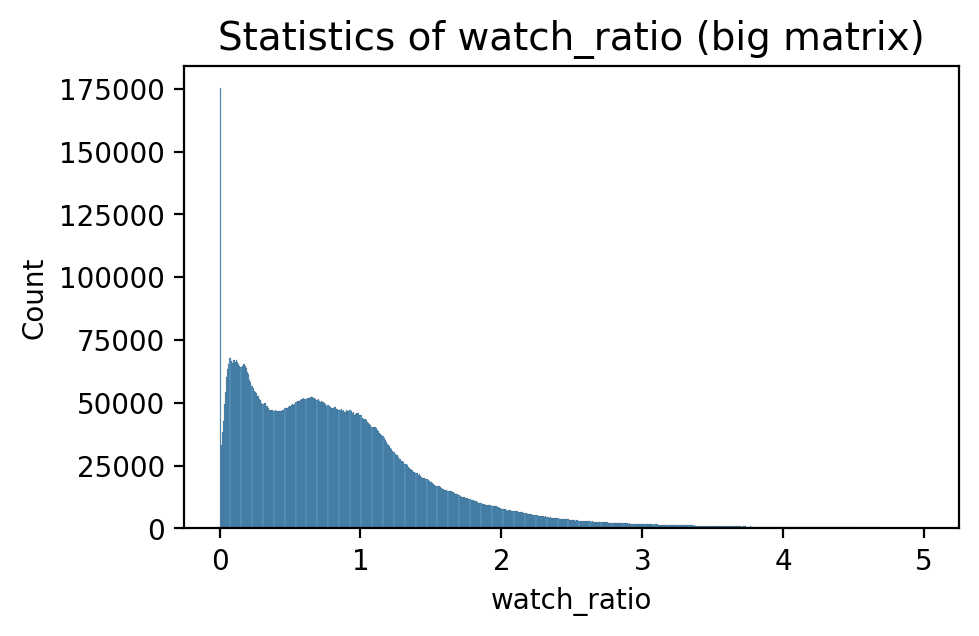

In [9]:
plot_hist_feature("big matrix", interactions_train.watch_ratio[interactions_train.watch_ratio <= 5])

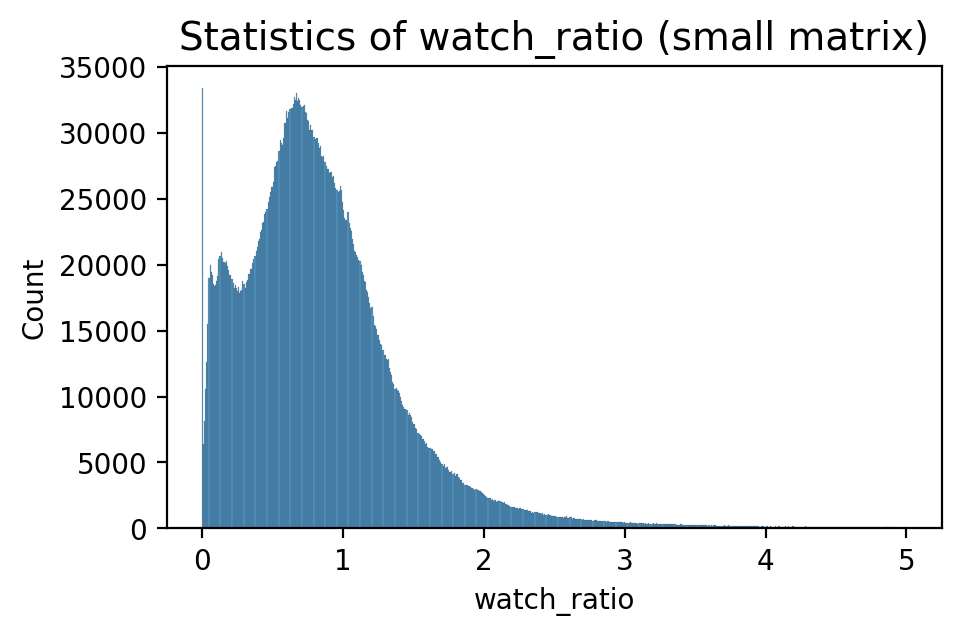

In [19]:
plot_hist_feature("small matrix", interactions_test.watch_ratio[interactions_test.watch_ratio <= 5])

#### Watch Ratio

In [20]:
plot_hist_feature("big matrix", interactions_train.video_duration[interactions_train.loc[:, "video_duration"] < 100000], kde=True)

TypeError: plot_hist_feature() got an unexpected keyword argument 'kde'

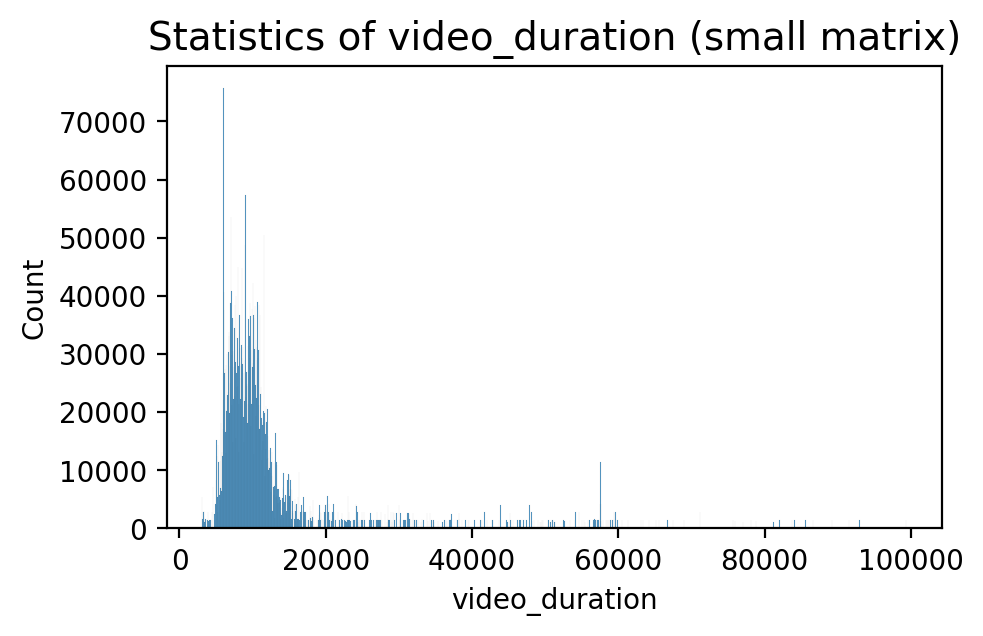

In [14]:
plot_hist_feature("small matrix", interactions_test.video_duration[interactions_test.loc[:, "video_duration"] < 100000], kde=True)

#### Video interactions

They all have interaction. 

Around 10% of the dataset have less than 10 interactions. Some video (3%) have a lot of interactions, more than 5000.

Some skyrockets with 10000 interactions (4 videos)

* More than 5000 interactions: 2.96%
* Less than 5000 interactions: 97.03%
* Less than **50 interactions: 28.51%**
* Less than **10 interactions: 11.14%**

In [ ]:
# Interactions per video
nb_interactions_per_video = interactions_train.groupby('video_id')['user_id'] \
    .count() \
    .reset_index(name='total_interactions')
plt.figure(figsize=(10, 6))
print(f"> 10000 interactions: {nb_interactions_per_video[nb_interactions_per_video['total_interactions'] > 10000]['total_interactions'].count() / nb_interactions_per_video['total_interactions'].count()}")
print(f"> 5000 interactions: {nb_interactions_per_video[nb_interactions_per_video['total_interactions'] > 5000]['total_interactions'].count() / nb_interactions_per_video['total_interactions'].count()}")
print(f"< 5000 interactions: {nb_interactions_per_video[nb_interactions_per_video['total_interactions'] < 5000]['total_interactions'].count() / nb_interactions_per_video['total_interactions'].count()}")
print(f"< 50 interactions: {nb_interactions_per_video[nb_interactions_per_video['total_interactions'] < 50]['total_interactions'].count() / nb_interactions_per_video['total_interactions'].count()}")
print(f"< 10 interactions: {nb_interactions_per_video[nb_interactions_per_video['total_interactions'] < 10]['total_interactions'].count() / nb_interactions_per_video['total_interactions'].count()}")
print(f"0 interactions: {nb_interactions_per_video[nb_interactions_per_video['total_interactions'] == 0]['total_interactions'].count() / nb_interactions_per_video['total_interactions'].count()}")
print(f"[50,5000] interactions: {nb_interactions_per_video[(nb_interactions_per_video['total_interactions'] > 50) & (nb_interactions_per_video['total_interactions'] < 5000)]['total_interactions'].count() / nb_interactions_per_video['total_interactions'].count()}")
print(f"NB videos with more than 10000 interactions: {nb_interactions_per_video[nb_interactions_per_video['total_interactions'] > 10000]['total_interactions'].count()}")

sns.histplot(nb_interactions_per_video['total_interactions'], kde=True, bins=30)

plt.xlabel('Number of Interactions per Video')
plt.ylabel('Number of Videos')
plt.title('Distribution of Total Interactions per Video')

plt.show()

In [ ]:
# Interactions per video
nb_interactions_per_video = interactions_train.drop_duplicates(subset=['user_id', 'video_id']).groupby('video_id')['user_id'] \
    .count() \
    .reset_index(name='total_interactions')
plt.figure(figsize=(10, 6))
sns.histplot(nb_interactions_per_video['total_interactions'], kde=True, bins=30)

plt.xlabel('Number of Interactions per Video (unique)')
plt.ylabel('Number of Videos')
plt.title('Distribution of Total Interactions per Video')

plt.show()

## User Features

The user dataset including features about the user itself.

This can be useful if we were to consider user characteristics in our recommendation.

In [3]:
users = pd.read_csv("data_final_project/KuaiRec 2.0/data/user_features.csv")
users

,user_id,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,follow_user_num_range,fans_user_num,fans_user_num_range,friend_user_num,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
0,0,high_active,0,0,0,5,"(0,10]",0,0,0,...,184,6,3,0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,full_active,0,0,0,386,"(250,500]",4,"[1,10)",2,...,186,6,2,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,full_active,0,0,0,27,"(10,50]",0,0,0,...,51,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,full_active,0,0,0,16,"(10,50]",0,0,0,...,251,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,full_active,0,0,0,122,"(100,150]",4,"[1,10)",0,...,99,4,2,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,7171,full_active,0,0,1,52,"(50,100]",1,"[1,10)",0,...,259,1,4,0,1.0,0.0,0.0,0.0,0.0,0.0
7172,7172,full_active,0,0,0,45,"(10,50]",2,"[1,10)",2,...,11,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0
7173,7173,full_active,0,0,0,615,500+,3,"[1,10)",2,...,51,2,2,0,1.0,0.0,0.0,0.0,0.0,0.0
7174,7174,full_active,0,0,0,959,500+,0,0,0,...,107,3,2,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
users.describe()

,user_id,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,fans_user_num,friend_user_num,register_days,onehot_feat0,onehot_feat1,...,onehot_feat8,onehot_feat9,onehot_feat10,onehot_feat11,onehot_feat12,onehot_feat13,onehot_feat14,onehot_feat15,onehot_feat16,onehot_feat17
count,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,7176.000000,...,7176.000000,7176.000000,7176.000000,7176.000000,7099.000000,7101.000000,7101.000000,7102.000000,7102.000000,7102.000000
mean,3587.500000,0.000418,0.006828,0.169593,197.327899,12.553094,4.494844,296.790691,0.392280,2.670569,...,168.661511,3.831940,2.264353,0.137124,0.298774,0.104633,0.094775,0.018586,0.017882,0.014503
std,2071.677098,0.020444,0.082357,0.375301,426.543245,181.017537,44.897861,286.381320,0.488293,1.782502,...,96.254783,1.747046,1.063131,0.500184,0.457753,0.306102,0.292925,0.135068,0.132533,0.119560
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1793.750000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,132.000000,0.000000,1.000000,...,88.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3587.500000,0.000000,0.000000,0.000000,33.000000,2.000000,0.000000,225.000000,0.000000,2.000000,...,167.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5381.250000,0.000000,0.000000,0.000000,130.000000,6.000000,1.000000,324.000000,1.000000,4.000000,...,255.000000,5.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7175.000000,1.000000,1.000000,1.000000,2100.000000,11401.000000,1425.000000,2245.000000,1.000000,7.000000,...,339.000000,6.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
users.shape

(7176, 31)

### Generic questions

#### DTypes

In [89]:
print(users.dtypes)
print(users["follow_user_num_range"].unique())
print(users["register_days_range"].unique())
print(users["fans_user_num_range"].unique())
print(users["is_live_streamer"].unique())
print(users["is_video_author"].unique())
# follow_user_num_range, register_days_range, fans_user_num_range -> OHE
# is_live_streamer, is_video_author -> boolean

user_id                    int64
user_active_degree        object
is_lowactive_period        int64
is_live_streamer           int64
is_video_author            int64
follow_user_num            int64
follow_user_num_range     object
fans_user_num              int64
fans_user_num_range       object
friend_user_num            int64
friend_user_num_range     object
register_days              int64
register_days_range       object
onehot_feat0               int64
onehot_feat1               int64
onehot_feat2               int64
onehot_feat3               int64
onehot_feat4             float64
onehot_feat5               int64
onehot_feat6               int64
onehot_feat7               int64
onehot_feat8               int64
onehot_feat9               int64
onehot_feat10              int64
onehot_feat11              int64
onehot_feat12            float64
onehot_feat13            float64
onehot_feat14            float64
onehot_feat15            float64
onehot_feat16            float64
onehot_fea

#### NA

In [128]:
print(users.isna().any())
users = users.drop(columns=users.filter(regex=r'^onehot_feat\d{1,2}$').columns)
print(users[users.isna().any(axis=1)])
print(users.dropna().shape[0] / interactions_test.shape[0])
#users = users.dropna()

user_id                  False
user_active_degree       False
is_lowactive_period      False
is_live_streamer         False
is_video_author          False
follow_user_num          False
follow_user_num_range    False
fans_user_num            False
fans_user_num_range      False
friend_user_num          False
friend_user_num_range    False
register_days            False
register_days_range      False
onehot_feat0             False
onehot_feat1             False
onehot_feat2             False
onehot_feat3             False
onehot_feat4              True
onehot_feat5             False
onehot_feat6             False
onehot_feat7             False
onehot_feat8             False
onehot_feat9             False
dtype: bool
Empty DataFrame
Columns: [user_id, user_active_degree, is_lowactive_period, is_live_streamer, is_video_author, follow_user_num, follow_user_num_range, fans_user_num, fans_user_num_range, friend_user_num, friend_user_num_range, register_days, register_days_range]
Index: []
0.

In [129]:
f"{users.memory_usage(deep=True).sum() / (1024 ** 2)} MB"

'2.3309030532836914 MB'

#### Duplicates

In [130]:
print(users[users.duplicated(subset=['user_id'])])

Empty DataFrame
Columns: [user_id, user_active_degree, is_lowactive_period, is_live_streamer, is_video_author, follow_user_num, follow_user_num_range, fans_user_num, fans_user_num_range, friend_user_num, friend_user_num_range, register_days, register_days_range]
Index: []


### User Features

#### User active degree repartition

This feature does not have a lot of information gain, **we should drop it**

Most of the users are either full or highly active.
User interactions are in fact greater in *full_active* than other categories though the difference is not relevant

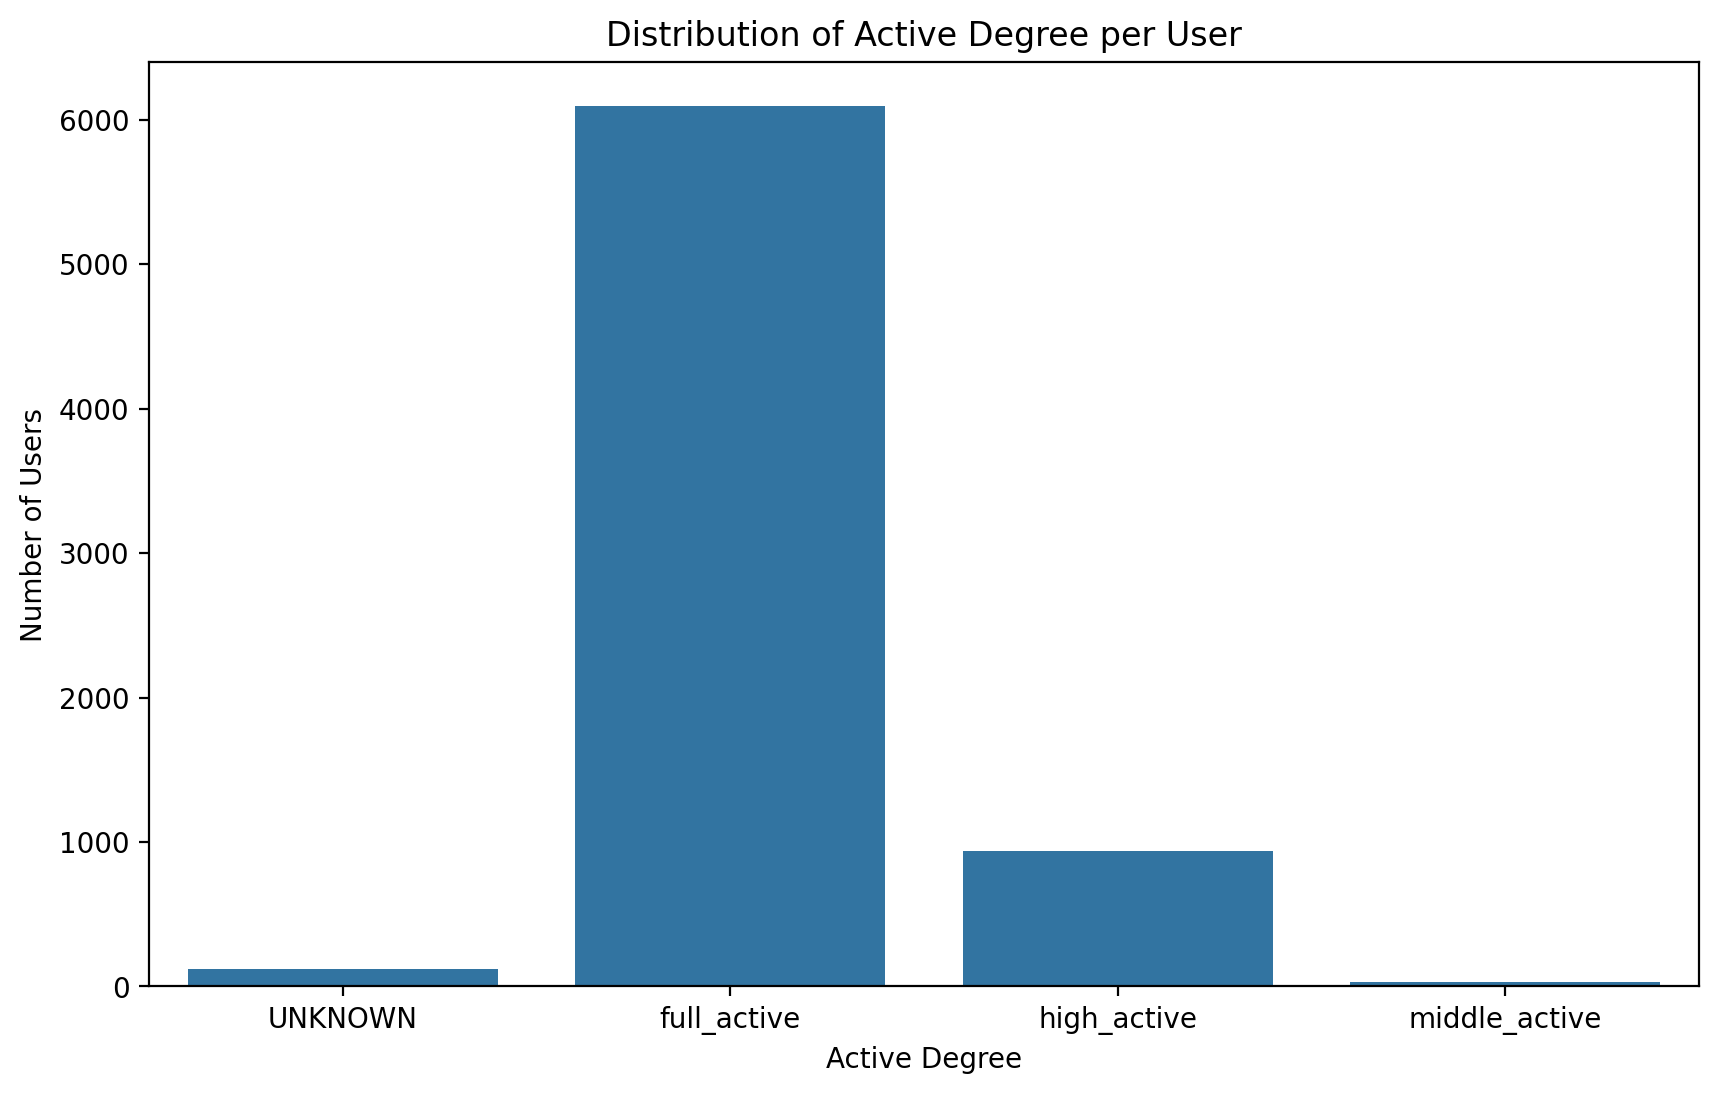

In [7]:
# Create the active degree distribution (number of users per active degree)
active_degree_repartition = users.groupby('user_active_degree')['user_id'] \
    .count() \
    .reset_index(name='active_degree_repartition')

plt.figure(figsize=(10, 6))
sns.barplot(x='user_active_degree', y='active_degree_repartition', data=active_degree_repartition)

plt.xlabel('Active Degree')
plt.ylabel('Number of Users')
plt.title('Distribution of Active Degree per User')

plt.show()

In [8]:
interactions_per_user = interactions_train.groupby('user_id')['video_id'].count().reset_index(name='total_interactions')

interaction_per_category = interactions_per_user.merge(users[['user_id', 'user_active_degree']], on='user_id')

plt.figure(figsize=(12, 6))
sns.boxplot(hue='user_active_degree', y='total_interactions', data=interaction_per_category, legend=True)

plt.xlabel('User Active Degree')
plt.ylabel('Total Interactions per User')
plt.title('Distribution of Total Interactions per User by Category')

plt.show()

NameError: name 'interactions_train' is not defined

#### Streamers / Video Makers and their interactions

We anaylze the impact of the user's category with their interactions

The category of user **does not hold any particular information**

Streamers tend to interact a little bit more, but it is not relevant in our case

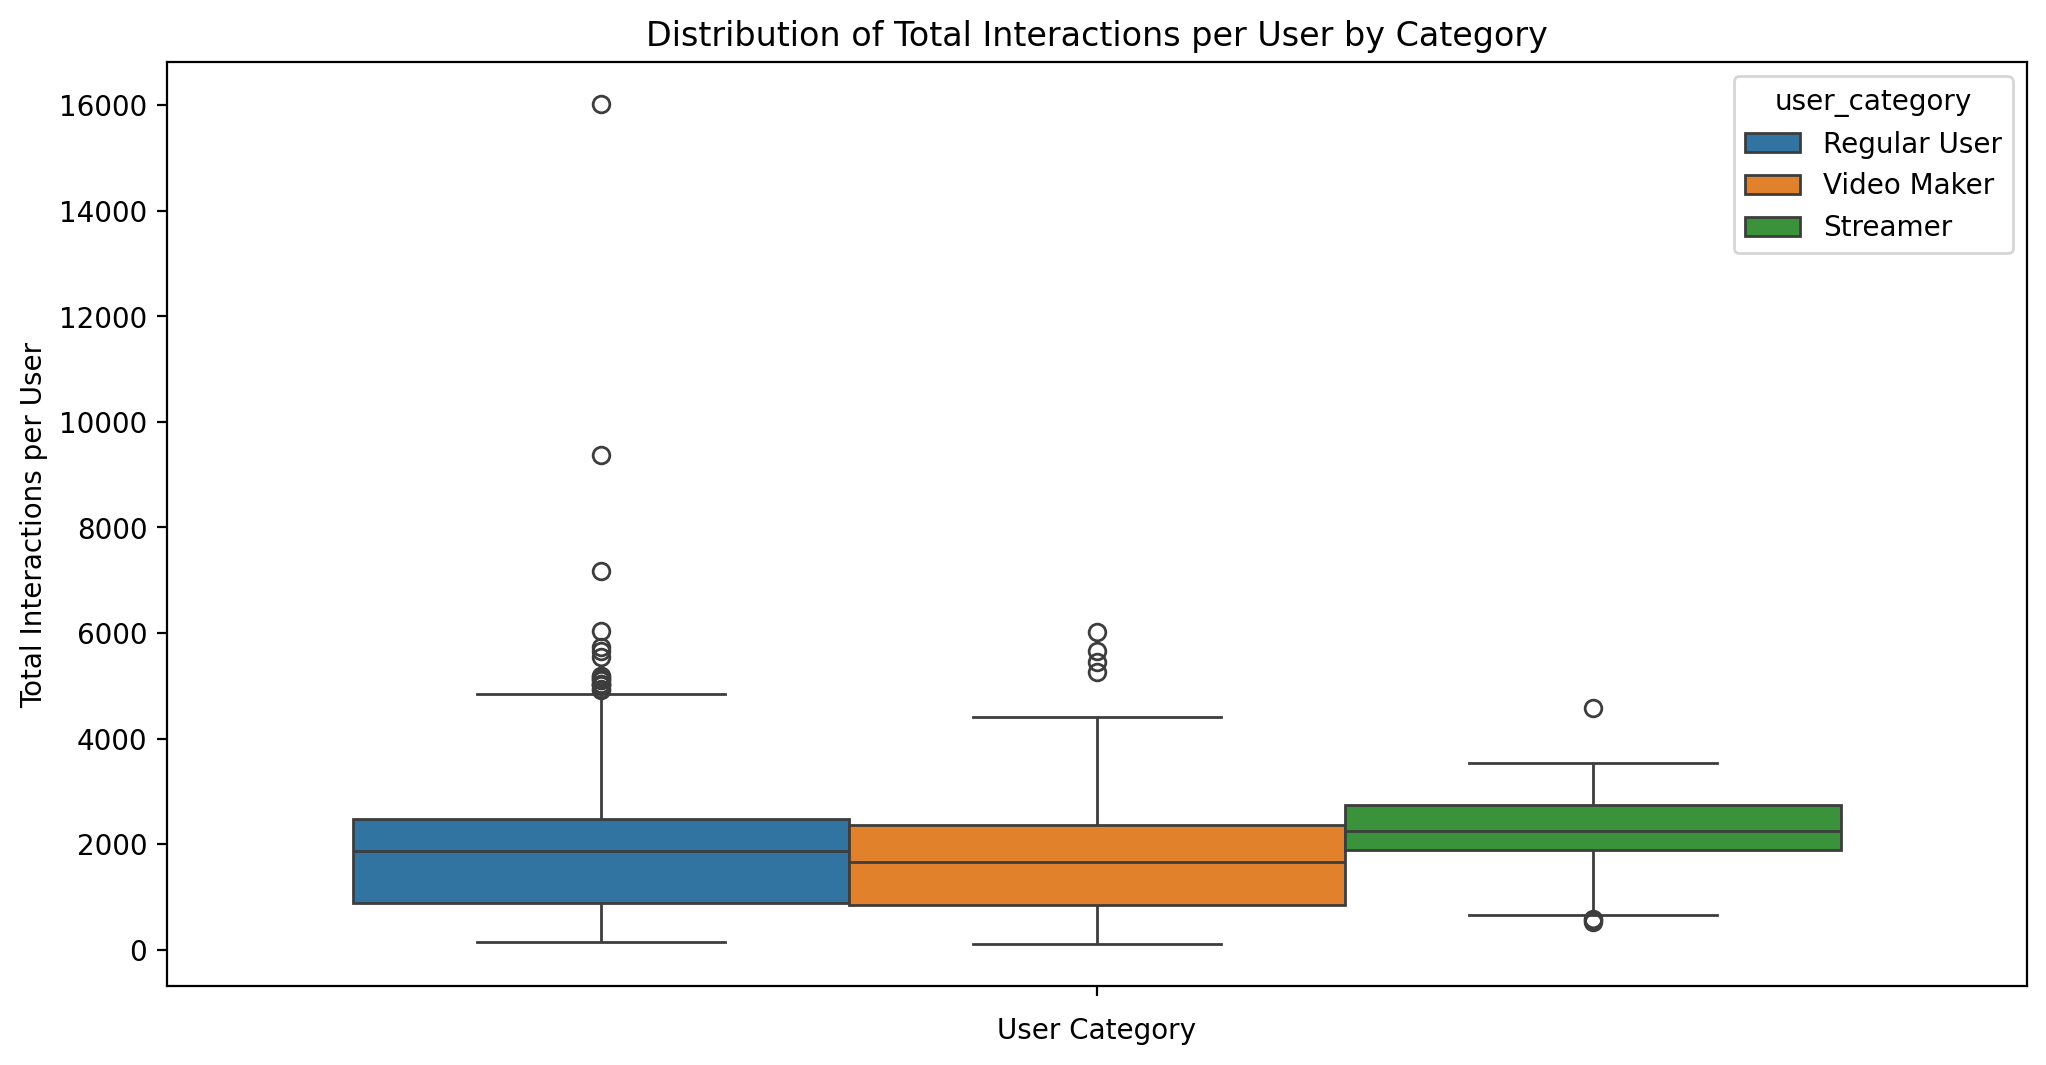

In [10]:
interactions_per_user = interactions_train.groupby('user_id')['video_id'].count().reset_index(name='total_interactions')

users['user_category'] = 'Regular User'
users.loc[users['is_video_author'] == 1, 'user_category'] = 'Video Maker'
users.loc[users['is_live_streamer'] == 1, 'user_category'] = 'Streamer'

interaction_per_category = interactions_per_user.merge(users[['user_id', 'user_category']], on='user_id')

plt.figure(figsize=(12, 6))
sns.boxplot(hue='user_category', y='total_interactions', data=interaction_per_category, legend=True)

plt.xlabel('User Category')
plt.ylabel('Total Interactions per User')
plt.title('Distribution of Total Interactions per User by Category')

plt.show()

#### Famous / Not Famous interactions

We anaylze the impact of the user's followers and following with their interactions

The following / followers of user **does not hold any particular information**

We can see some outliers as well and there are no specific categories having more interactions

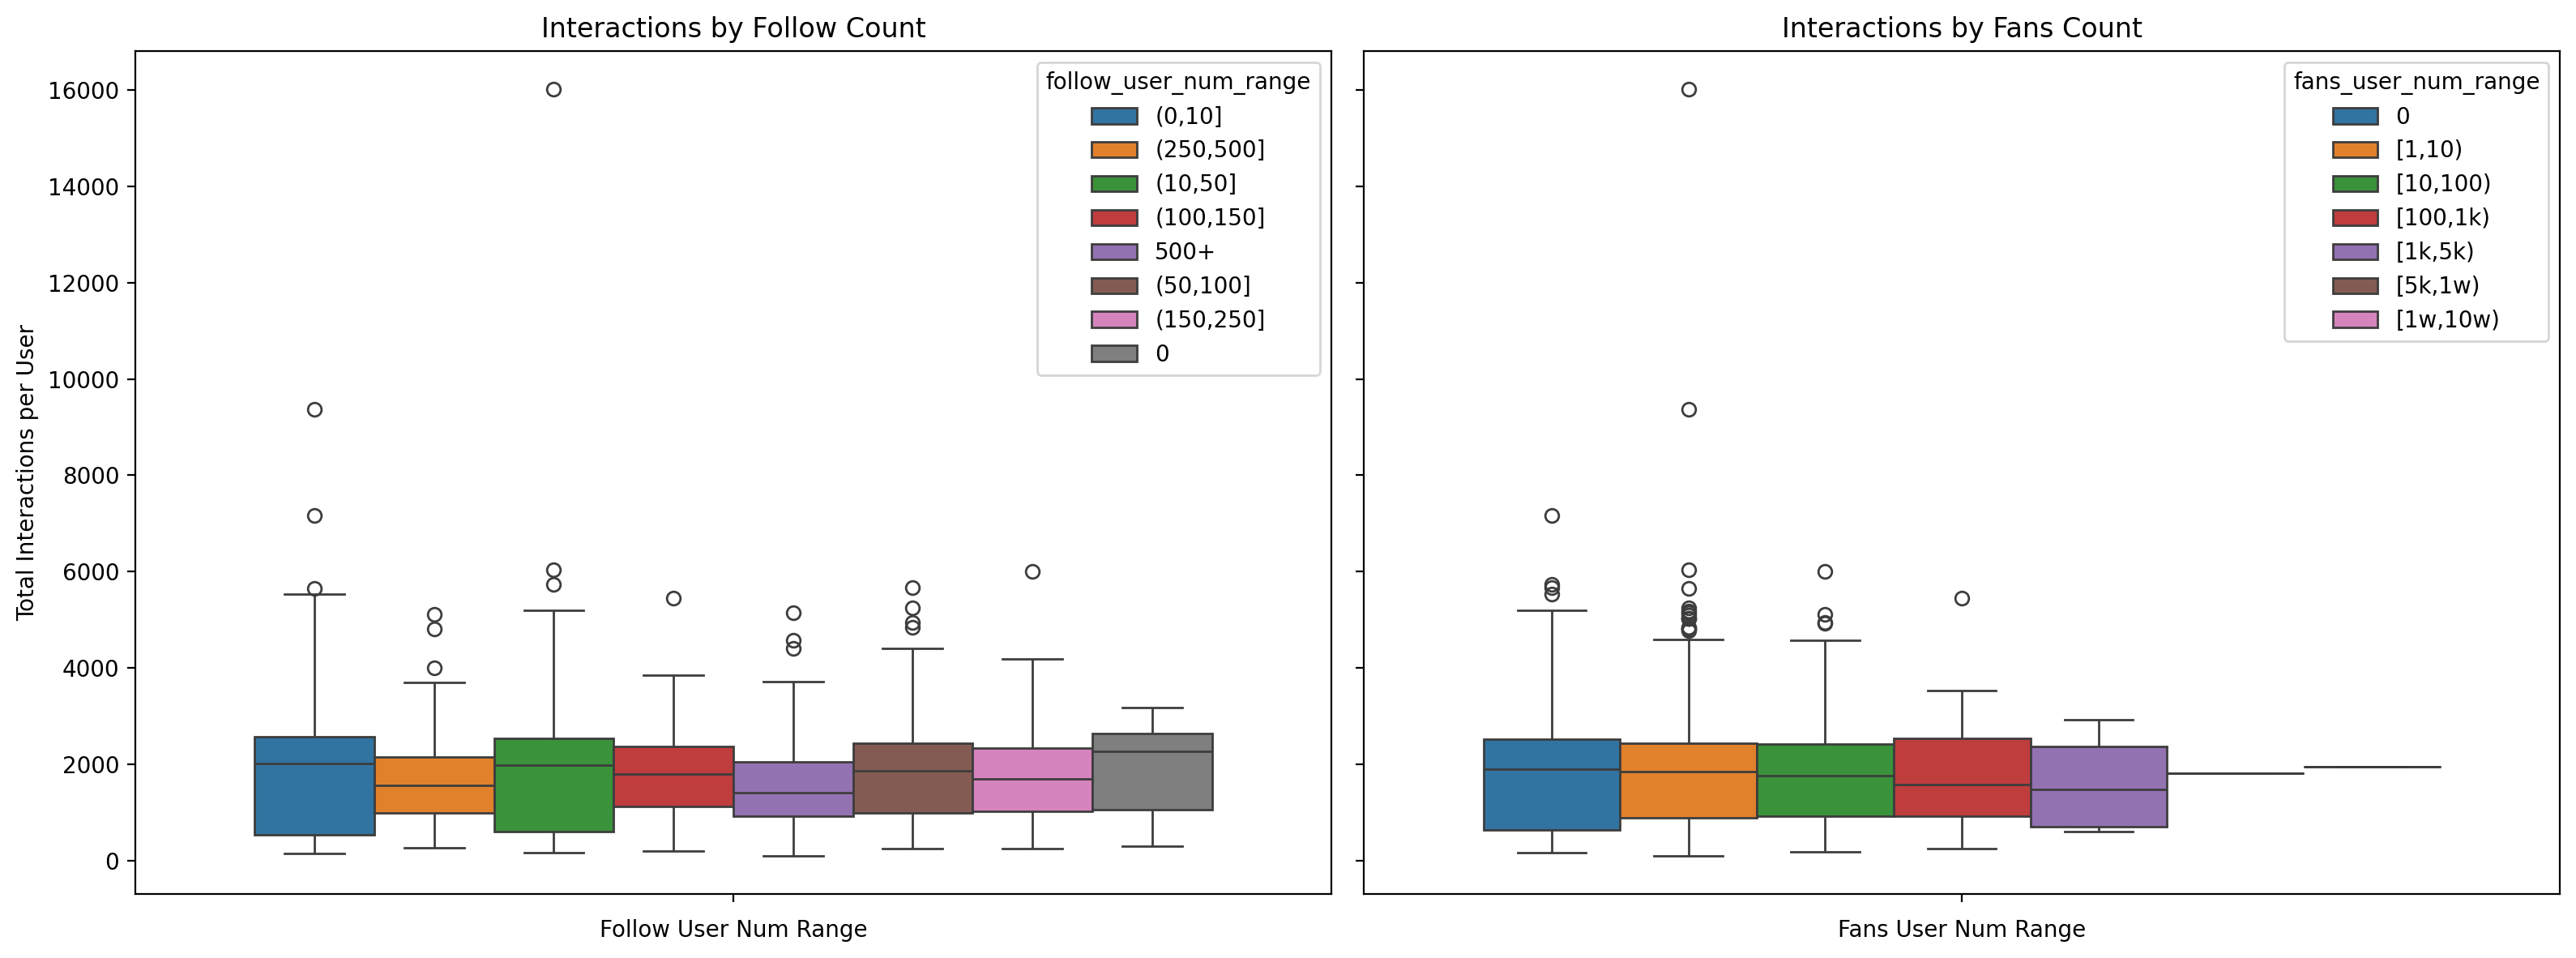

In [161]:
interactions_per_user = interactions_train.groupby('user_id')['video_id'].count().reset_index(name='total_interactions')
interaction_with_bins = interactions_per_user.merge(
    users[['user_id', 'follow_user_num_range', 'fans_user_num_range']],
    on='user_id'
)

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Boxplot for follow_user_num_range
sns.boxplot(hue='follow_user_num_range', y='total_interactions', data=interaction_with_bins, ax=axes[0], legend=True)
axes[0].set_xlabel('Follow User Num Range')
axes[0].set_ylabel('Total Interactions per User')
axes[0].set_title('Interactions by Follow Count')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot for fans_user_num_range
sns.boxplot(hue='fans_user_num_range', y='total_interactions', data=interaction_with_bins, ax=axes[1], legend=True)
axes[1].set_xlabel('Fans User Num Range')
axes[1].set_ylabel('')  # Already shown on the left
axes[1].set_title('Interactions by Fans Count')
axes[1].tick_params(axis='x', rotation=45)

# Layout adjustment
plt.tight_layout()
plt.show()

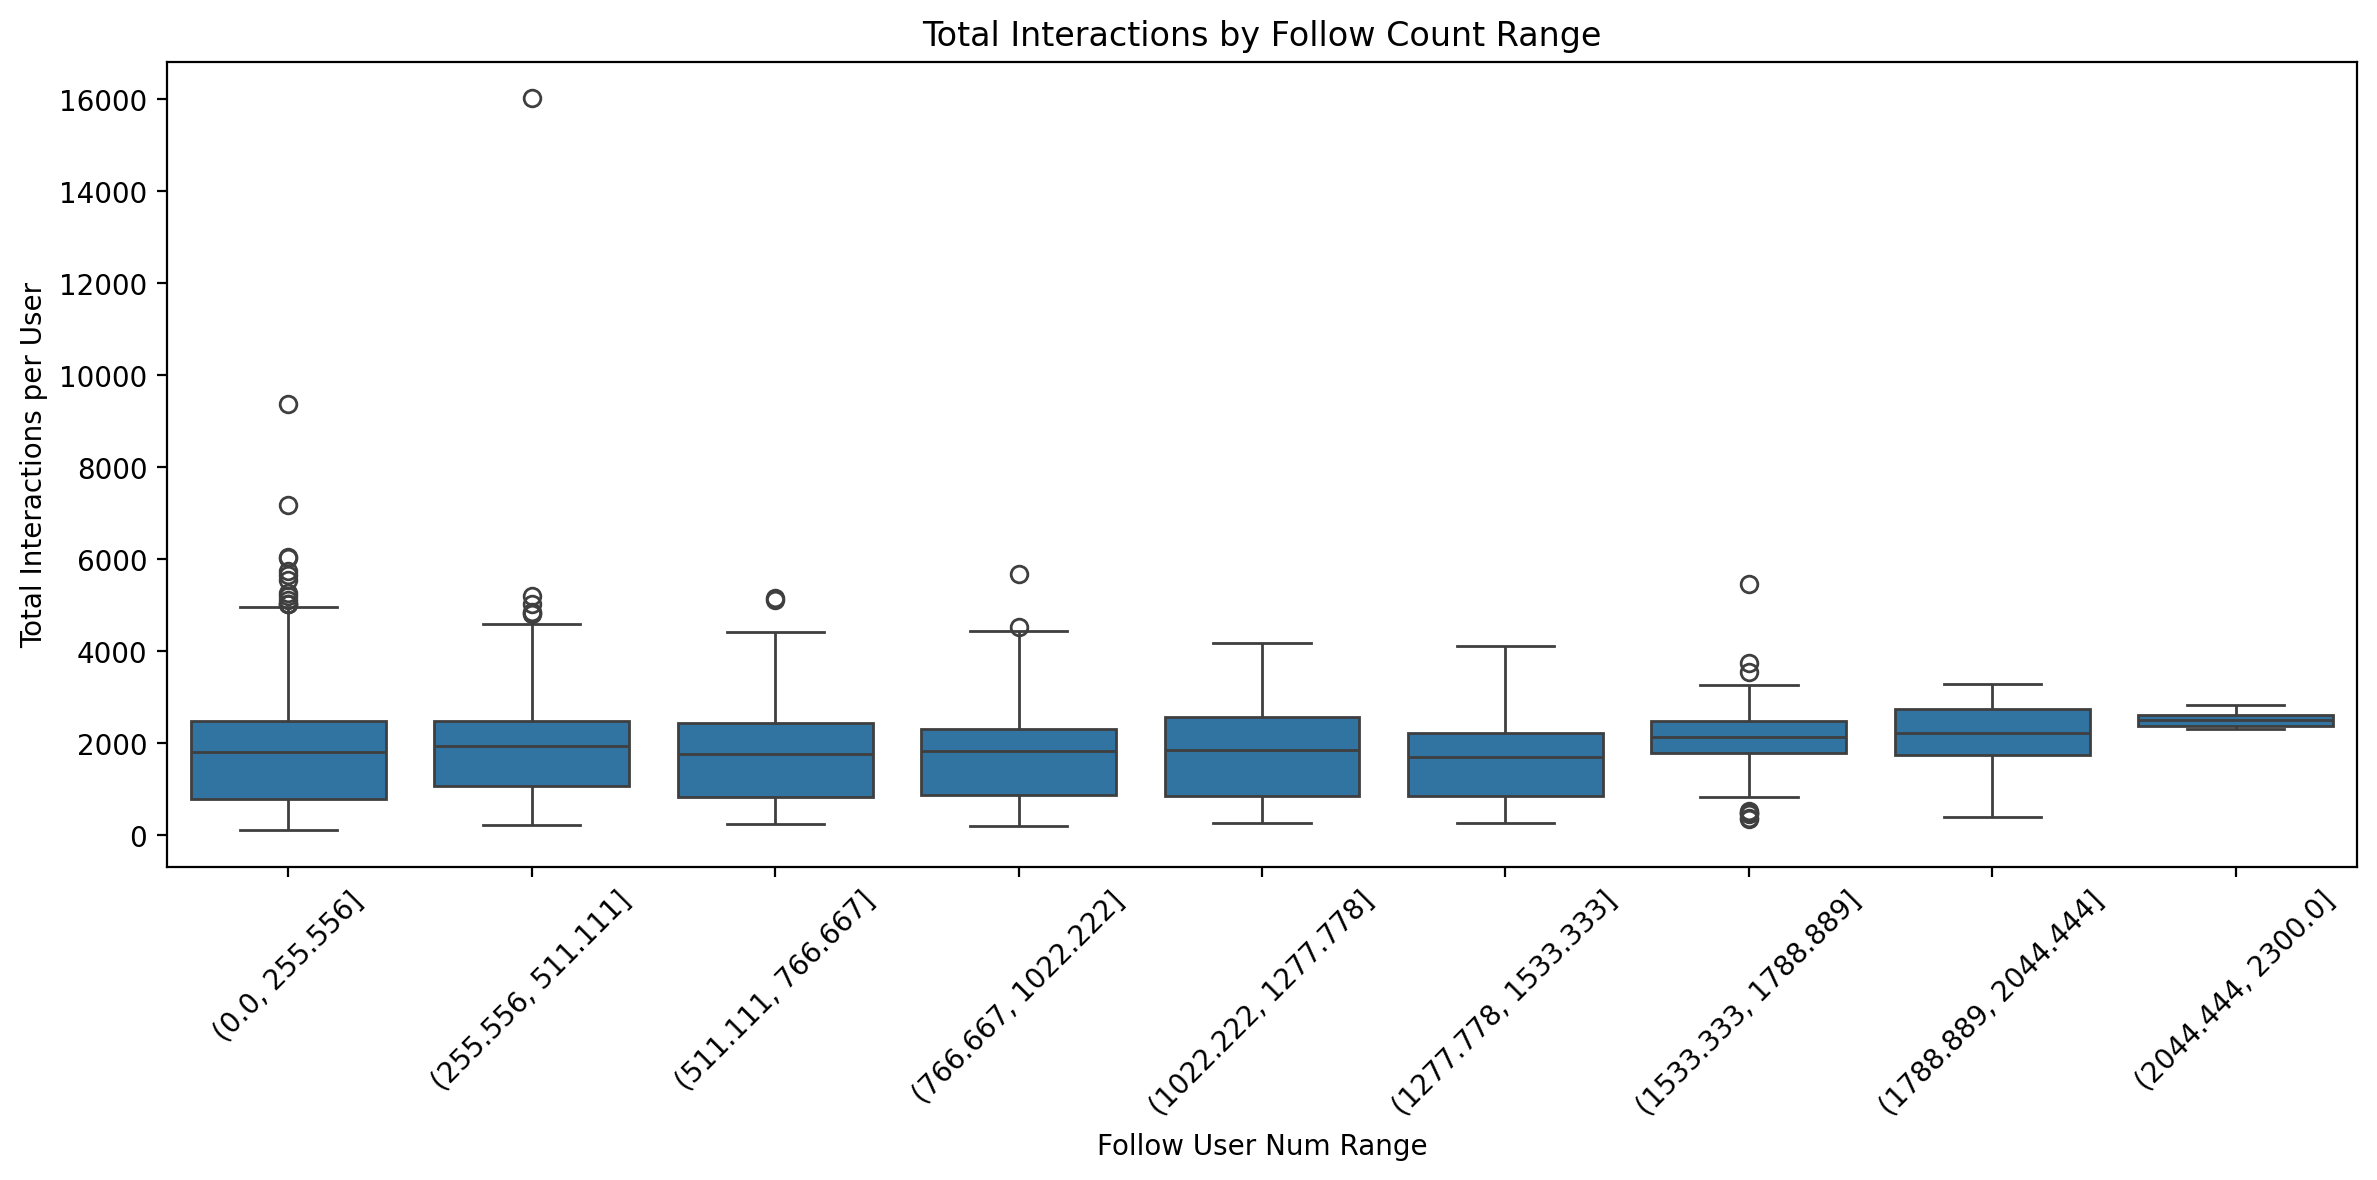

In [153]:
interactions_per_user = interactions_train.groupby('user_id')['video_id'].count().reset_index(name='total_interactions')
interaction_with_bins = interactions_per_user.merge(
    users[['user_id', 'register_days']],
    on='user_id'
)
interaction_with_bins["register_days"] = pd.cut(interaction_with_bins['register_days'], np.linspace(0, 2300, 10))

plt.figure(figsize=(12, 6))
sns.boxplot(x='register_days', y='total_interactions', data=interaction_with_bins)

plt.xlabel('Follow User Num Range')
plt.ylabel('Total Interactions per User')
plt.title('Total Interactions by Follow Count Range')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000
...,...,...,...,...,...,...,...,...
12530801,7175,1281,34618,140017,2020-09-05 15:07:10.576,20200905,1.599290e+09,0.247241
12530802,7175,3407,12619,21888,2020-09-05 15:08:45.228,20200905,1.599290e+09,0.576526
12530803,7175,10360,2407,7067,2020-09-05 19:10:29.041,20200905,1.599304e+09,0.340597
12530804,7175,10360,6455,7067,2020-09-05 19:10:36.995,20200905,1.599304e+09,0.913400


## Item Daily Features

This dataset contains daily interactions on the video.

This may be useful when we'll consider **video characterstics on a daily basis** or to **create a more long term feature**.

In [ ]:
video_daily = pd.read_csv("data_final_project/KuaiRec 2.0/data/item_daily_features.csv")
video_daily.head()

In [ ]:
video_daily.describe()

## Social Network

The social network graph is also given.

This can be useful to **recommend a video based on friendship / followers**

We could even detect clusters of users that have similar interests.

In [ ]:
social_network = pd.read_csv("data_final_project/KuaiRec 2.0/data/social_network.csv")
social_network.head()

In [ ]:
social_network.shape

## Video Features

We can use the video features including caption and categories.

This may be useful if we were to **recommend a video using its categories and its caption**.

This dataset can also be useful to create **the categories id mapping** (category_id -> category_name)

In [ ]:
video_features = pd.read_csv("data_final_project/KuaiRec 2.0/data/kuairec_caption_category.csv", lineterminator='\n')
video_features.head()

## Video Categories

In [ ]:
The video categories dataset 

In [ ]:
video_categories = pd.read_csv("data_final_project/KuaiRec 2.0/data/item_categories.csv")
video_categories.head()